In [259]:
import numpy as np 
import scipy 
import pylab as plt

In [260]:

BohrRad=0.529177e-10
Dalton=1.66053906892e-27
Dalton_eV=931.49410372*1e6

me=9.1093837e-31
mH=1.00784*Dalton
mT=3.01604928178*Dalton

mH_in_eV=1.00784*Dalton_eV
mT_in_eV=3.01604928178*Dalton_eV
GGHz2H = 1.519829846e-7

muoveH=mH/(2*me)
muoveT=mT/(2*me)

#fundamental consts
h=	6.62607015e-34
PlanckeVHz=4.135667696e-15
c=2.99792458e8
hc=197.3269631e-9

# Tritium constants
HyperFine=21e-2
delW=c/HyperFine
gI=5.585
ge=2
gL=1
gS=2
L=0
S=0.5
I=0.5
J=0.5
mue=9.27e-24
mN=1e9
me=5.11e5
muN=mue*me/mN

In [261]:
# B range
B=np.linspace(0,1,1000)

In [262]:
def Potential(R):
    x=R*BohrRad/4.16e-10
    D=1.28
    KToH=315775
    F=(x>D)+(x<D)*np.exp(-(D/x-1)**2)
    return 6.46/KToH*(4.889e4*np.exp(0.0968-8.6403*x-2.427*x**2)-(1.365/x**6+0.425/x**8+0.183/x**10)*F)


In [263]:

import numpy as np
def ddxH(y,rho, l, p):
    u=y[0]
    v=y[1]
    dudx=v
    dvdx=(-p**2+2*muoveH*Potential(rho) + l*(l+1)/(rho**2))*u
    return [dudx,dvdx]


def ddxT(y,rho, l, p):
    u=y[0]
    v=y[1]
    dudx=v
    dvdx=(-p**2+2*muoveT*Potential(rho) + l*(l+1)/(rho**2))*u
    return [dudx,dvdx]

import numpy as np
def ddxDumb(y,rho, l, p):
    u=y[0]
    v=y[1]
    dudx=v
    dvdx=-p**2*u
    return [dudx,dvdx]

In [264]:
def P2fromP1(p1,ea,eb,eap,ebp,m):
    mu=m/2
    E1=p1**2/(2*mu)
    E2=E1+ea+eb-eap-ebp
    p2=np.sqrt(2*mu*E2)
    return p2

In [265]:
def GetWellBehavedCentralState(PToInt=1, lToInt=2, L=1000, r0=0.1, function=ddxH):
    def ddxToint(rho,y):
        return function(y,rho,lToInt,PToInt)   
    rhos=np.linspace(r0,L,100000)
    
    Init=[complex(1,0.0),complex(0,PToInt)]
    State=scipy.integrate.solve_ivp(ddxToint,[rhos[0],rhos[-1]],Init,t_eval=rhos,method='RK23')
    Norm=(State.y[0]**2+(1/PToInt*State.y[1])**2)**0.5
    return [rhos,State.y[0]/(Norm[-1])]


In [266]:
def GetHyperfineLevel(pm,mF,delW=1.428e9,I=0.5,L=0,J=0.5,mN=1,gI=5.585,ge=2.02):
    h=6.6e-34
    c=3e8
    S=0.5
    mue=9.27e-24
    me=5.11e5
    muN=mue*me/(1e9*mN)

    gJ=gL*(J*(J+1)+L*(L+1)-S*(S+1))/(2*J*(J+1))  +ge*(J*(J+1)-L*(L+1)+S*(S+1))/(2*J*(J+1))
    
    x=B*(gJ*mue-gI*muN)/(h *delW)
    Term1=-h*delW/(2*(2*I+1))*np.ones_like(B)
    Term2=muN*gI*mF*B
    if(abs(mF)==abs(I+0.5)):
        sgn=mF/(I+0.5)
        Term3=h*delW/2*(1+sgn*x)
    else:    
        Term3=pm*h*delW/2*np.sqrt(1+2*mF*x/(I+0.5)+x**2)

    delE=(Term1+Term2+Term3)/h
    
    return delE

In [267]:
def AllHFLevels(delW=1.428e9,I=0.5,L=0,J=0.5,mN=1,gI=5.585,ge=2.02):
    I=0.5
    ct=0
    delEs=[]
    for pm in [-1,1]:
        F=I+pm*0.5
        for mF in np.arange(-F,F+1,1):
            delEs.append(GetHyperfineLevel(pm,mF,delW,I,L,J,mN,gI,ge))
    delEs=np.array(delEs)
    delEs=np.sort(delEs,axis=0)
    delEDict={}
    for i in range(0,4):
        letter=chr(97+i)
        delEDict[letter]=delEs[i]
    return delEDict            

Text(0.5, 0, 'B (T)')

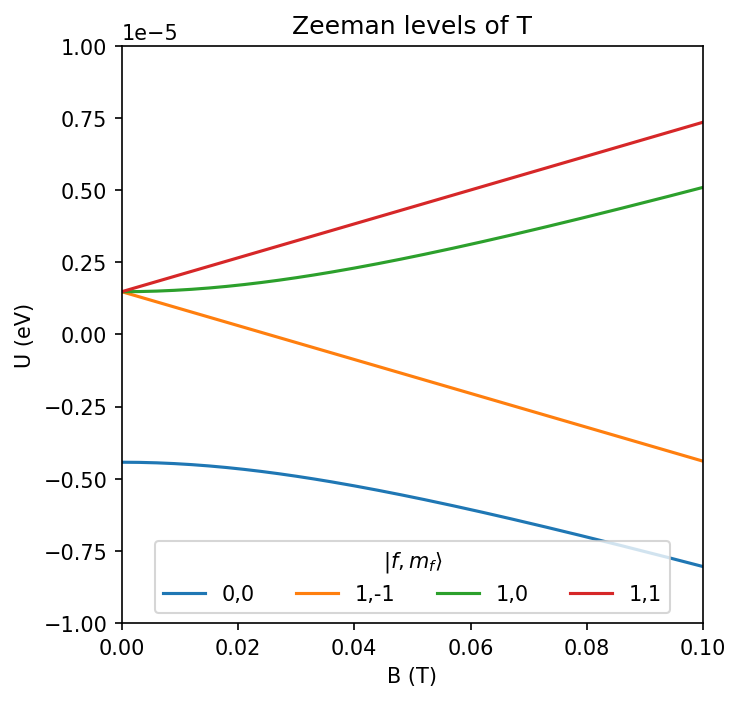

In [268]:
cols=['DarkRed','DarkBlue','purple','black']
plt.figure(figsize=(5,5),dpi=150)
I=0.5
ct=0
for pm in [-1,1]:
    F=I+pm*0.5
    for mF in np.arange(-F,F+1,1):

        delE=GetHyperfineLevel(pm,mF,delW=1.428e9,I=0.5,L=0,J=0.5,mN=3,gI=5.585,ge=2.02)
        plt.plot(B,delE*PlanckeVHz,label=str(int(F))+","+str(int(mF)))

    
        ct=ct+1

plt.xlim(0,0.1)
plt.ylim(-1e-5,1e-5)
plt.title(r"Zeeman levels of T")
plt.legend(loc='lower center',ncol=4,title=r'$|f,m_f\rangle$' )
plt.ylabel("U (eV)")
plt.xlabel("B (T)")

In [269]:
Levels=AllHFLevels(delW=1.428e9,I=0.5,L=0,J=0.5,mN=1,gI=5.585,ge=2.02)
Levels['d'][0]*PlanckeVHz

1.4764333674720002e-06

Text(0.5, 0, 'P1 (eV)')

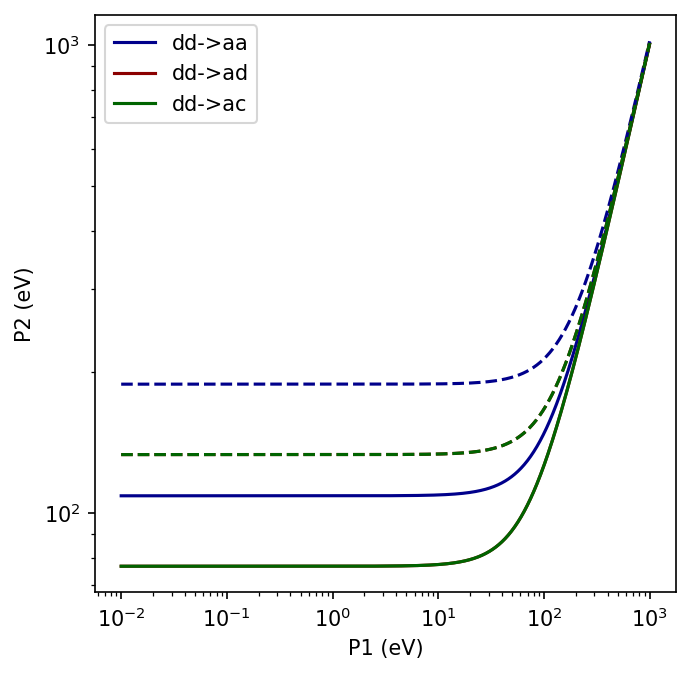

In [270]:

# all the units here in eV
plt.figure(figsize=(5,5),dpi=150)
P1s=np.logspace(-2,3,1000)
plt.plot(P1s,P2fromP1(P1s,Levels['d'][0]*PlanckeVHz,Levels['d'][0]*PlanckeVHz,Levels['a'][0]*PlanckeVHz,Levels['a'][0]*PlanckeVHz,1e9),color='DarkBlue',label='dd->aa')
plt.plot(P1s,P2fromP1(P1s,Levels['d'][0]*PlanckeVHz,Levels['d'][0]*PlanckeVHz,Levels['a'][0]*PlanckeVHz,Levels['d'][0]*PlanckeVHz,1e9),color='DarkRed',label='dd->ad')
plt.plot(P1s,P2fromP1(P1s,Levels['d'][0]*PlanckeVHz,Levels['d'][0]*PlanckeVHz,Levels['a'][0]*PlanckeVHz,Levels['c'][0]*PlanckeVHz,1e9),color='DarkGreen',label='dd->ac')

plt.plot(P1s,P2fromP1(P1s,Levels['d'][0]*PlanckeVHz,Levels['d'][0]*PlanckeVHz,Levels['a'][0]*PlanckeVHz,Levels['a'][0]*PlanckeVHz,3e9),'--',color='DarkBlue')
plt.plot(P1s,P2fromP1(P1s,Levels['d'][0]*PlanckeVHz,Levels['d'][0]*PlanckeVHz,Levels['a'][0]*PlanckeVHz,Levels['d'][0]*PlanckeVHz,3e9),'--',color='DarkRed')
plt.plot(P1s,P2fromP1(P1s,Levels['d'][0]*PlanckeVHz,Levels['d'][0]*PlanckeVHz,Levels['a'][0]*PlanckeVHz,Levels['c'][0]*PlanckeVHz,3e9),'--',color='DarkGreen')
plt.legend(loc='upper left')
plt.loglog()
plt.ylabel(r"P2 (eV)")
plt.xlabel(r"P1 (eV)")


In [271]:
# in eV
P2AtZeroP1=P2fromP1(0,Levels['d'][0]*PlanckeVHz,Levels['d'][0]*PlanckeVHz,Levels['a'][0]*PlanckeVHz,Levels['a'][0]*PlanckeVHz,3e9)

# in m^-1 (divide by 197 MeV fm)
P2AtZeroP1_inversem=P2AtZeroP1/hc

# in inverse Bohr (multiply by Bohr Radius in m)
eV_to_invB=BohrRad/hc
P2AtZeroP1_inverseBohr=P2AtZeroP1*eV_to_invB

Text(0.5, 0, 'P1 (a$^{-1}$)')

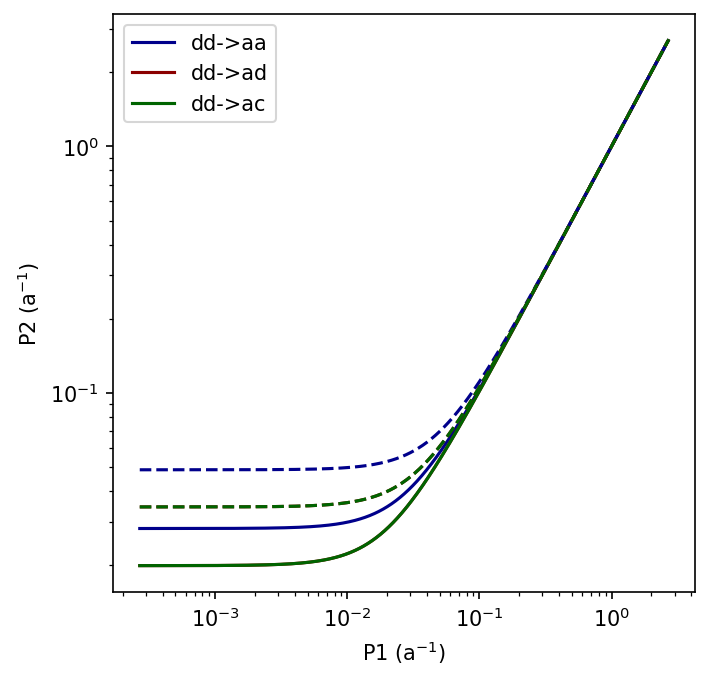

In [272]:

# all the units here in eV
plt.figure(figsize=(5,5),dpi=150)
P1s=np.logspace(0,4,1000)
plt.plot(P1s*eV_to_invB,P2fromP1(P1s,Levels['d'][0]*PlanckeVHz,Levels['d'][0]*PlanckeVHz,Levels['a'][0]*PlanckeVHz,Levels['a'][0]*PlanckeVHz,mH_in_eV)*eV_to_invB,color='DarkBlue',label='dd->aa')
plt.plot(P1s*eV_to_invB,P2fromP1(P1s,Levels['d'][0]*PlanckeVHz,Levels['d'][0]*PlanckeVHz,Levels['a'][0]*PlanckeVHz,Levels['d'][0]*PlanckeVHz,mH_in_eV)*eV_to_invB,color='DarkRed',label='dd->ad')
plt.plot(P1s*eV_to_invB,P2fromP1(P1s,Levels['d'][0]*PlanckeVHz,Levels['d'][0]*PlanckeVHz,Levels['a'][0]*PlanckeVHz,Levels['c'][0]*PlanckeVHz,mH_in_eV)*eV_to_invB,color='DarkGreen',label='dd->ac')

plt.plot(P1s*eV_to_invB,P2fromP1(P1s,Levels['d'][0]*PlanckeVHz,Levels['d'][0]*PlanckeVHz,Levels['a'][0]*PlanckeVHz,Levels['a'][0]*PlanckeVHz,mT_in_eV)*eV_to_invB,'--',color='DarkBlue')
plt.plot(P1s*eV_to_invB,P2fromP1(P1s,Levels['d'][0]*PlanckeVHz,Levels['d'][0]*PlanckeVHz,Levels['a'][0]*PlanckeVHz,Levels['d'][0]*PlanckeVHz,mT_in_eV)*eV_to_invB,'--',color='DarkRed')
plt.plot(P1s*eV_to_invB,P2fromP1(P1s,Levels['d'][0]*PlanckeVHz,Levels['d'][0]*PlanckeVHz,Levels['a'][0]*PlanckeVHz,Levels['c'][0]*PlanckeVHz,mT_in_eV)*eV_to_invB,'--',color='DarkGreen')
plt.legend(loc='upper left')
plt.loglog()
plt.ylabel(r"P2 (a$^{-1}$)")
plt.xlabel(r"P1 (a$^{-1}$)")


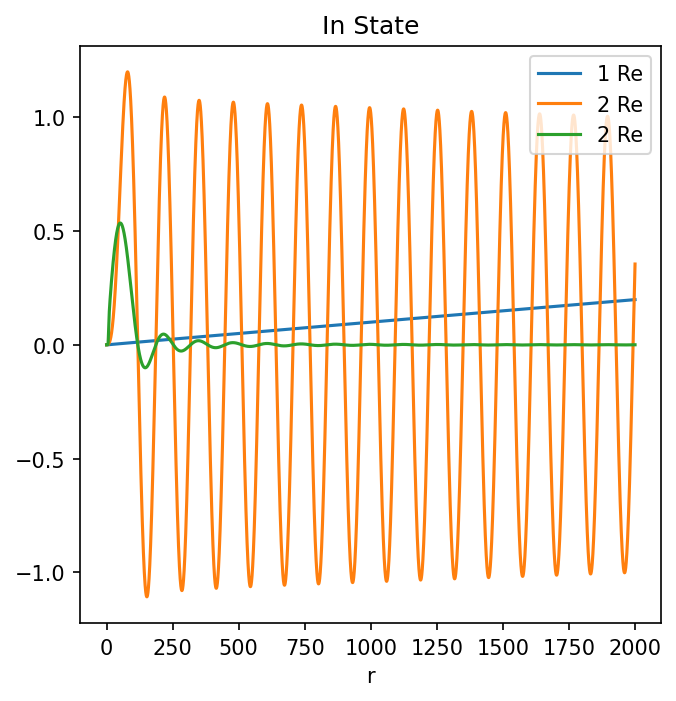

In [273]:
P1=1e-4
P2=P2fromP1(P1,Levels['d'][0]*PlanckeVHz,Levels['d'][0]*PlanckeVHz,Levels['a'][0]*PlanckeVHz,Levels['a'][0]*PlanckeVHz,mT_in_eV)*eV_to_invB

rhos, State1=GetWellBehavedCentralState(PToInt=P1,lToInt=0,L=2000,r0=0.01,)
rhos, State2=GetWellBehavedCentralState(PToInt=P2,lToInt=2,L=2000,r0=0.01,)
Integrand=State1*State2/(rhos**3)/(P1*P2)

plt.figure(figsize=(5,5), dpi=150)
plt.title("In State")
plt.plot(rhos,np.real(State1),label='1 Re')
plt.plot(rhos,np.real(State2),label='2 Re')
plt.plot(rhos,Integrand*1e2,label='2 Re')
Integral=sum(Integrand*(rhos[1]-rhos[0]))
plt.legend(loc='upper right')
#plt.plot(rhos)
#plt.loglog()
plt.xlabel("r")
plt.show()

In [274]:
from scipy.integrate import quad
from scipy.interpolate import interp1d

In [275]:
ain='d'
bin='d'
aout='a'
bout='d'

def GetIntegrals (ain,bin,aout,bout,L=1000,r0=0.01,P1s=np.logspace(-6,0,100)):
    
    IntegralsH=[]
    IntegralsT=[]
    
    for P1 in P1s:       
        P2T=P2fromP1(P1/eV_to_invB,Levels[ain][0]*PlanckeVHz,Levels[bin][0]*PlanckeVHz,Levels[aout][0]*PlanckeVHz,Levels[bout][0]*PlanckeVHz,mT_in_eV)*eV_to_invB
        rhos, State1=GetWellBehavedCentralState(PToInt=P1,lToInt=0,L=L,r0=r0,function=ddxT)
        rhos, State2=GetWellBehavedCentralState(PToInt=P2T,lToInt=2,L=L,r0=r0,function=ddxT)
        Integrand=interp1d(rhos,np.real(State1*State2/(rhos**3)),kind='quadratic')
        IntegralsT.append(quad(Integrand,rhos[0],rhos[-1])[0]/(P1*P2T))
        
        P2H=P2fromP1(P1/eV_to_invB,Levels[ain][0]*PlanckeVHz,Levels[bin][0]*PlanckeVHz,Levels[aout][0]*PlanckeVHz,Levels[bout][0]*PlanckeVHz,mH_in_eV)*eV_to_invB
        rhos, State1=GetWellBehavedCentralState(PToInt=P1,lToInt=0,L=L,r0=r0,function=ddxH)
        rhos, State2=GetWellBehavedCentralState(PToInt=P2H,lToInt=2,L=L,r0=r0,function=ddxH)
        Integrand=interp1d(rhos,np.real(State1*State2/(rhos**3)),kind='quadratic')
        IntegralsH.append(quad(Integrand,rhos[0],rhos[-1])[0]/(P1*P2H))
    return(IntegralsT, IntegralsH)

/var/folders/vy/ll7qjbxx66v846pybl4qyvh80000gs/T/ipykernel_71826/496694268.py:16: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  IntegralsT.append(quad(Integrand,rhos[0],rhos[-1])[0]/(P1*P2T))
/var/folders/vy/ll7qjbxx66v846pybl4qyvh80000gs/T/ipykernel_71826/496694268.py:22: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  pro

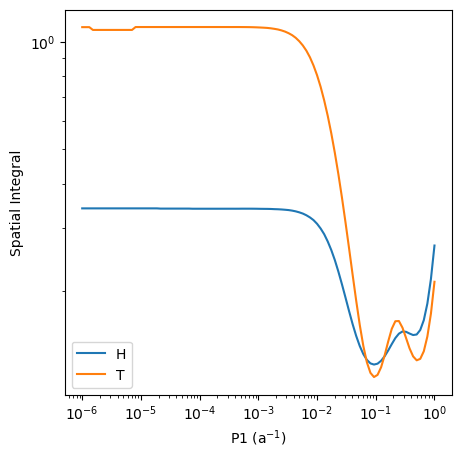

In [276]:
P1s=np.logspace(-6,0,100)
IntegralsT,IntegralsH=GetIntegrals ('d','d','a','a',L=2000,r0=0.01,P1s=P1s)
plt.figure(figsize=(5,5),dpi=100)
plt.ylabel("Spatial Integral")
plt.plot(P1s, IntegralsH,label='H')
plt.plot(P1s, IntegralsT,label='T')
plt.loglog()
plt.xlabel(r"P1 (a$^{-1}$)")
plt.legend(loc='lower left')

In [ ]:
#Following Eq 43 in the paper
Rataa=[]
Ratad=[]
Ratac=[]
Ls=np.linspace(100,2000,100)
for L in Ls:
    r0=0.0001
    P1H=0.001
    P1T=0.001
    ain='d'
    bin='d'
    aout='a'
    bout='a'
    P2T=P2fromP1(P1T,Levels[ain][0]*PlanckeVHz,Levels[bin][0]*PlanckeVHz,Levels[aout][0]*PlanckeVHz,Levels[bout][0]*PlanckeVHz,mT_in_eV)*eV_to_invB
    P2H=P2fromP1(P1H,Levels[ain][0]*PlanckeVHz,Levels[bin][0]*PlanckeVHz,Levels[aout][0]*PlanckeVHz,Levels[bout][0]*PlanckeVHz,mH_in_eV)*eV_to_invB
    IntegralsT,IntegralsH=GetIntegrals (ain,bin,aout,bout,L=L,r0=r0,P1s=[P1])
    GRatio=(P2T*mT_in_eV)/(P2H*mH_in_eV)*IntegralsT[0]**2/IntegralsH[0]**2
    Rataa.append(np.real(GRatio))
    
    ain='d'
    bin='d'
    aout='a'
    bout='d'
    P2T=P2fromP1(P1T,Levels[ain][0]*PlanckeVHz,Levels[bin][0]*PlanckeVHz,Levels[aout][0]*PlanckeVHz,Levels[bout][0]*PlanckeVHz,mT_in_eV)*eV_to_invB
    P2H=P2fromP1(P1H,Levels[ain][0]*PlanckeVHz,Levels[bin][0]*PlanckeVHz,Levels[aout][0]*PlanckeVHz,Levels[bout][0]*PlanckeVHz,mH_in_eV)*eV_to_invB
    IntegralsT,IntegralsH=GetIntegrals (ain,bin,aout,bout,L=L,r0=r0,P1s=[P1])
    GRatio=(P2T*mT_in_eV)/(P2H*mH_in_eV)*IntegralsT[0]**2/IntegralsH[0]**2
    Ratad.append( np.real(GRatio))
    
    ain='d'
    bin='d'
    aout='a'
    bout='c'
    P2T=P2fromP1(P1,Levels[ain][0]*PlanckeVHz,Levels[bin][0]*PlanckeVHz,Levels[aout][0]*PlanckeVHz,Levels[bout][0]*PlanckeVHz,mT_in_eV)*eV_to_invB
    P2H=P2fromP1(P1,Levels[ain][0]*PlanckeVHz,Levels[bin][0]*PlanckeVHz,Levels[aout][0]*PlanckeVHz,Levels[bout][0]*PlanckeVHz,mH_in_eV)*eV_to_invB
    IntegralsT,IntegralsH=GetIntegrals (ain,bin,aout,bout,L=L,r0=r0,P1s=[P1])
    GRatio=(P2T*mT_in_eV)/(P2H*mH_in_eV)*IntegralsT[0]**2/IntegralsH[0]**2
    Ratac.append( np.real(GRatio))

In [ ]:
plt.figure(figsize=(5,5),dpi=150)
plt.plot(Ls,Rataa)
plt.plot(Ls,Ratac)
plt.plot(Ls,Ratad)
plt.xlim(0,2000)
plt.ylim(0,120)
plt.xlabel("L")
plt.ylabel("Ratio")

In [ ]:
Rataa[-1]

In [ ]:
Ratad[-1]